In [98]:
import subprocess
from io import BytesIO

import folium
import hvplot.pandas
import pandas as pd
import requests
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### North Fork Flathead River, Montana

![The North Fork Flathead River winds through cobble banks surrounded by yellow fall foliage with alpine mountains in the background](https://www.bigskyfishing.com/wordpress/wp-content/uploads/2018/03/north-fork-flathead-28-lead.jpg)

>Image Source: [Big Sky Fishing](https://www.bigskyfishing.com/rivers/northwest-montana/north-fork-flathead-river/)

The North Fork Flathead River flows from Alberta, Canada into Montana, USA, joining the Middle and South Fork Flathead Rivers near Kalispell, Montana. It is a National Wild and Scenic River due to its remote location; only one small human settlement, Polebridge, MT, lies within the watershed. Native cutthroat and bull trout swim within the river and grizzly bears, wolves and moose walk its banks. The watershed contains large alpine mountains that receive over 60 inches of annual precipitation, generating substantial runoff especially during the snowmelt of late spring and early summer. 

Sources:
1. [American Rivers](https://www.americanrivers.org/river/north-fork-of-the-flathead-river/)
2. [Montana State Library](https://mslservices.mt.gov/geographic_information/data/datalist/datalist_MetadataDetail.aspx?did=%7B56375D06-3CBF-4B12-9D7B-B26166024E71%7D)

In [99]:
# Initialize map and tweak settings
sg_lat = 49.00124167
sg_lon = -114.4756639

m = folium.Map(
    # Location to display
    location=(sg_lat, sg_lon),
    # Turns off annoying zooming while trying to scroll to the next cell
    scrollWheelZoom=False)

# Put a marker at the stream gauge location
folium.Marker([sg_lat, sg_lon], 
              popup=
              "Stream Gage on the North Fork Flathead River" 
              "at the US - Canada Border"
).add_to(m)

# Display the map
m

Location of the USGS stream gage on the North Fork Flathead River, MT, USA

In [100]:
nwis_url = (
    "https://waterdata.usgs.gov/nwis/dv?cb_00010=on&cb_00060=on&format"
    "=rdb&site_no=12355000&legacy=&referred_module=sw&period"
    "=&begin_date=1975-09-18&end_date=1991-09-29"
)

# Send an HTTP GET request to the URL
nwis_response = requests.get(nwis_url)
nwis_response.raise_for_status()

nwis_response

<Response [200]>

In [101]:
# Print the top of the data
#for i, line in enumerate(nwis_response.content.splitlines()[:10]):
#    print(i, line)

In [102]:
# Print header to see where headings and data start
#for i, line in enumerate(nwis_response.content.splitlines()[:35]):
    # Skip commented lines
    #if not line.startswith(b'#'):
        #print(i, line)

In [103]:
# Import data with pandas
flathead_q_df = pd.read_csv(
    BytesIO(nwis_response.content),
    comment="#",
    delimiter="\t",
    skiprows=[31, 32],
    names=["agency_cd", "site_no", "Date", "water_t_max", "code1",
           "water_t_min", "code2", "water_t_mean", "code3", 
           "streamflow_cfs", "code4"],
    index_col="Date",
    parse_dates=True,
)

### Annual flows in the North Fork Flathead River are driven by snowmelt

<Axes: xlabel='Date', ylabel='Streamflow (cubic feet per second)'>

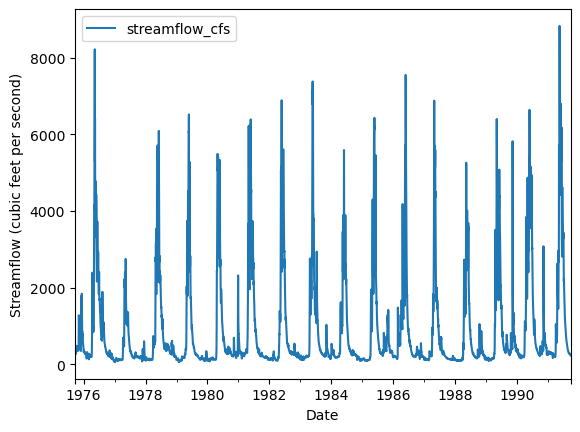

In [104]:
flathead_q_df.plot(y='streamflow_cfs',xlabel = 'Date', ylabel = 
                   'Streamflow (cubic feet per second)')

Streamflows in the North Fork Flathead River show a consistent peak once every year. This peak coincides with the snowmelt period of late spring and early summer. 

<Axes: xlabel='Date', ylabel='Streamflow (cubic feet per second)'>

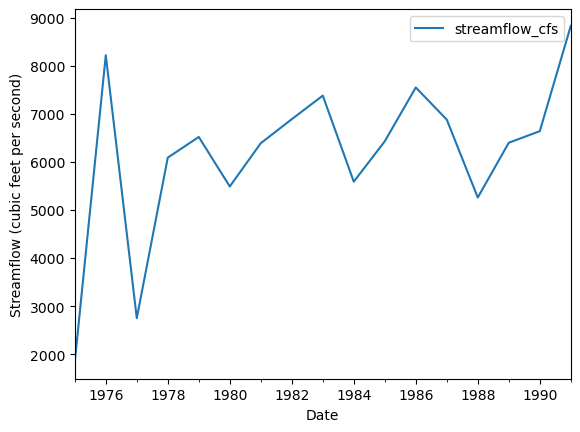

In [105]:
flathead_ann_max_q_df = flathead_q_df[['streamflow_cfs']].resample('AS').max()
flathead_ann_max_q_df.plot(xlabel = 'Date', ylabel = 
                           'Streamflow (cubic feet per second)')

Between 1976 and 1991, annual maximum streamflows were somewhat variable, mostly falling between 5500 cfs and 8000 cfs. 1977 was an anomalously low year. 

### Snowmelt size and timing can influence water temperature 

Streamflow and Water Temperature: 1977 - 1998

<Axes: xlabel='Date', ylabel='Streamflow (cubic feet per second)'>

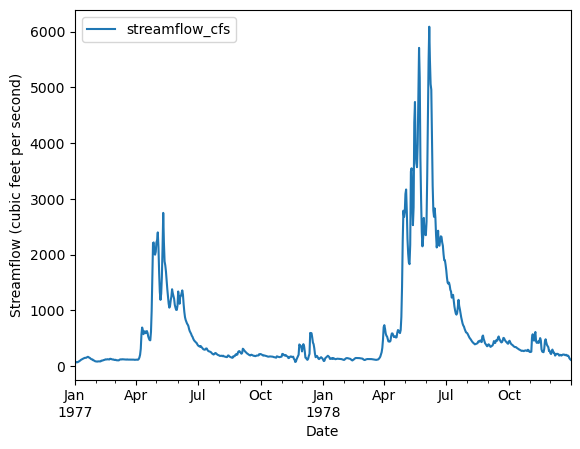

In [106]:
flathead_77to78_q_df = flathead_q_df['1977-01':'1978-12']
flathead_77to78_q_df.plot(y = 'streamflow_cfs', xlabel = 'Date', 
                          ylabel = 'Streamflow (cubic feet per second)')

<Axes: xlabel='Date', ylabel='Mean Water Temperature (C)'>

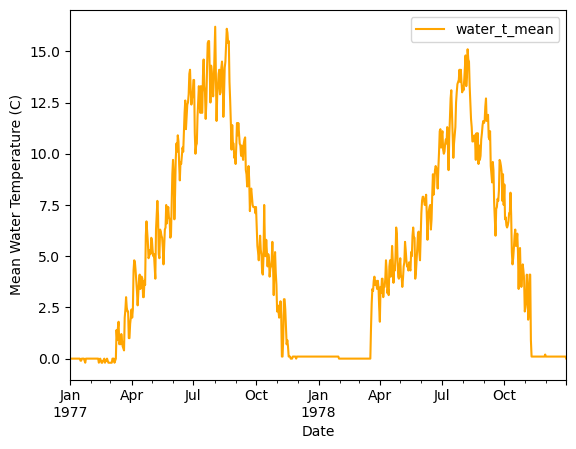

In [107]:
flathead_77to78_q_df.plot(y = 'water_t_mean', xlabel = 'Date', 
                          ylabel = 'Mean Water Temperature (C)', 
                          color = 'orange')

Comparing a year with an unusually small snowmelt peak (1977) to a "normal" year (1979) helps illustrate the effect of snowmelt on water temperature. Snowmelt fills the river with a large volume of cold water, buffering against the effect of warm summer air temperatures. During 1977, when the snowmelt season was shortlived and peak runoff flows were low, water temperatures peaked higher than in a typical year (see bottom graph) and stayed higher for longer. 

Data source: U.S. Geological Survey, 2023, National Water Information System data available on the World Wide Web (USGS Water Data for the Nation), accessed September 19, 2023, at URL [https://waterdata.usgs.gov/nwis/dv?cb_00010=on&cb_00060=on&format=rdb&site_no=12355000&legacy=&referred_module=sw&period=&begin_date=1975-09-18&end_date=1991-09-29]

In [108]:
%%capture
%%bash
jupyter nbconvert North_Fork_Flathead.ipynb --to html --no-input